<a href="https://colab.research.google.com/github/hosyain/1/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

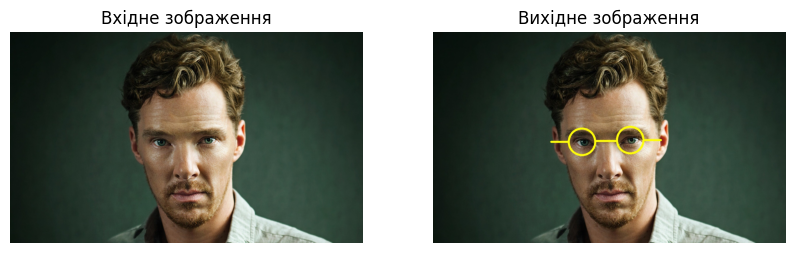

In [ ]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt


def load_data(file_path):
    return pd.read_excel(file_path)


def add_glasses_to_face(image_path, output_path, color=(0, 255, 255), thickness=6, temple_length=60):

    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:

        roi_gray = gray[y:y+h, x:x+w]
        roi_color = image[y:y+h, x:x+w]


        eyes = eye_cascade.detectMultiScale(roi_gray)


        if len(eyes) == 2:

            eyes = sorted(eyes, key=lambda ex: ex[0])
            (ex1, ey1, ew1, eh1), (ex2, ey2, ew2, eh2) = eyes


            eye1_center = (x + ex1 + ew1 // 2, y + ey1 + eh1 // 2)
            eye2_center = (x + ex2 + ew2 // 2, y + ey2 + eh2 // 2)
            radius = max(ew1, ew2) // 2


            cv2.circle(image, eye1_center, radius, color, thickness)
            cv2.circle(image, eye2_center, radius, color, thickness)
            bridge_y = (eye1_center[1] + eye2_center[1]) // 2
            cv2.line(image, (eye1_center[0] + radius, bridge_y), (eye2_center[0] - radius, bridge_y), color, thickness)


            cv2.line(image, (eye1_center[0] - radius, eye1_center[1]),
                     (eye1_center[0] - radius - temple_length, eye1_center[1]), color, thickness)
            cv2.line(image, (eye2_center[0] + radius, eye2_center[1]),
                     (eye2_center[0] + radius + temple_length, eye2_center[1]), color, thickness)


    cv2.imwrite(output_path, image)


def plot_images(input_path, output_path):
    input_image = cv2.imread(input_path)
    output_image = cv2.imread(output_path)


    input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
    output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)


    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(input_image_rgb)
    plt.title("Вхідне зображення")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(output_image_rgb)
    plt.title("Вихідне зображення")
    plt.axis("off")

    plt.show()


if __name__ == "__main__":

    excel_path = 'DataSet//kr1.xlsx'
    data_frame = load_data(excel_path)


    data_row = data_frame.iloc[0]


    input_image_path = 'DataSet//Images//random4.jpg'
    output_image_path = 'output_image_with_yellow_glasses.jpg'

    add_glasses_to_face(input_image_path, output_image_path)


    plot_images(input_image_path, output_image_path)
